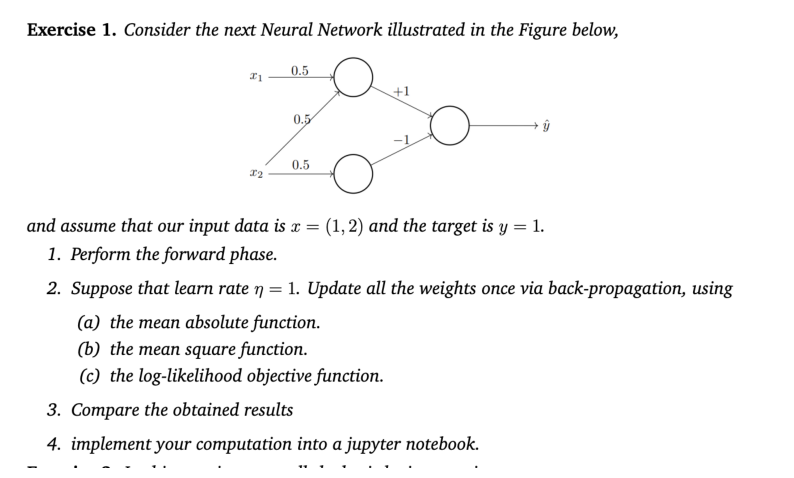

In [69]:
from PIL import Image
import matplotlib.pyplot as plt
image_path = '/content/exe_1.png'
image = Image.open(image_path)
image = image.convert('RGB')
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()


In [70]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(sigmoid_output):
    return sigmoid_output * (1 - sigmoid_output)

In [71]:
def mean_absolute_error(y, y_pred):
    return np.abs(y - y_pred)

def mae_derivative(y, y_pred):
    return np.where(y_pred > y, 1, -1)

def mean_squared_error(y, y_pred):
    return (y - y_pred) ** 2 / 2

def mse_derivative(y, y_pred):
    return y_pred - y

def log_likelihood(y, y_pred):
    return -y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)

def log_likelihood_derivative(y, y_pred):
    return -(y / y_pred) + (1 - y) / (1 - y_pred)



In [72]:
def forward_pass(x, w_input_hidden, w_hidden_output):
    z_hidden = np.dot(w_input_hidden.T, x)
    a_hidden = sigmoid(z_hidden)

    z_output = np.dot(w_hidden_output.T, a_hidden)
    y_pred = sigmoid(z_output)
    return z_hidden, a_hidden, z_output, y_pred

In [73]:
def backward_pass(x, y, z_hidden, a_hidden, z_output, y_pred, w_input_hidden, w_hidden_output, loss_derivative, learning_rate):
    error_output = loss_derivative(y, y_pred) * sigmoid_derivative(y_pred)
    dw_hidden_output = np.dot(a_hidden, error_output.T)

    error_hidden = np.dot(w_hidden_output, error_output) * sigmoid_derivative(a_hidden)
    dw_input_hidden = np.dot(x, error_hidden.T)

    w_input_hidden -= learning_rate * dw_input_hidden
    w_hidden_output -= learning_rate * dw_hidden_output
    return w_input_hidden, w_hidden_output

In [74]:
def main():
    x = np.array([[1], [2]])
    y = np.array([[1]])

    w_input_hidden = np.array([[0.5, 0.5], [0.5, 0.5]], dtype=np.float64)
    w_hidden_output = np.array([[1.0], [-1.0]], dtype=np.float64)

    learning_rate = 1

    z_hidden, a_hidden, z_output, y_pred = forward_pass(x, w_input_hidden, w_hidden_output)
    print(f"Initial prediction: {y_pred.flatten()}")

    print("\nUsing Mean Absolute Error (MAE):")
    w_input_hidden, w_hidden_output = backward_pass(x, y, z_hidden, a_hidden, z_output, y_pred,
                                                    w_input_hidden, w_hidden_output,
                                                    mae_derivative, learning_rate)
    _, _, _, y_pred_mae = forward_pass(x, w_input_hidden, w_hidden_output)
    print(f"Prediction after MAE update: {y_pred_mae.flatten()}")

    print("\nUsing Mean Squared Error (MSE):")
    w_input_hidden, w_hidden_output = backward_pass(x, y, z_hidden, a_hidden, z_output, y_pred,
                                                    w_input_hidden, w_hidden_output,
                                                    mse_derivative, learning_rate)
    _, _, _, y_pred_mse = forward_pass(x, w_input_hidden, w_hidden_output)
    print(f"Prediction after MSE update: {y_pred_mse.flatten()}")

    print("\nUsing Log-Likelihood:")
    w_input_hidden, w_hidden_output = backward_pass(x, y, z_hidden, a_hidden, z_output, y_pred,
                                                    w_input_hidden, w_hidden_output,
                                                    log_likelihood_derivative, learning_rate)
    _, _, _, y_pred_log = forward_pass(x, w_input_hidden, w_hidden_output)
    print(f"Prediction after Log-Likelihood update: {y_pred_log.flatten()}")

main()

Initial prediction: [0.5]

Using Mean Absolute Error (MAE):
Prediction after MAE update: [0.59608713]

Using Mean Squared Error (MSE):
Prediction after MSE update: [0.64183356]

Using Log-Likelihood:
Prediction after Log-Likelihood update: [0.79413799]


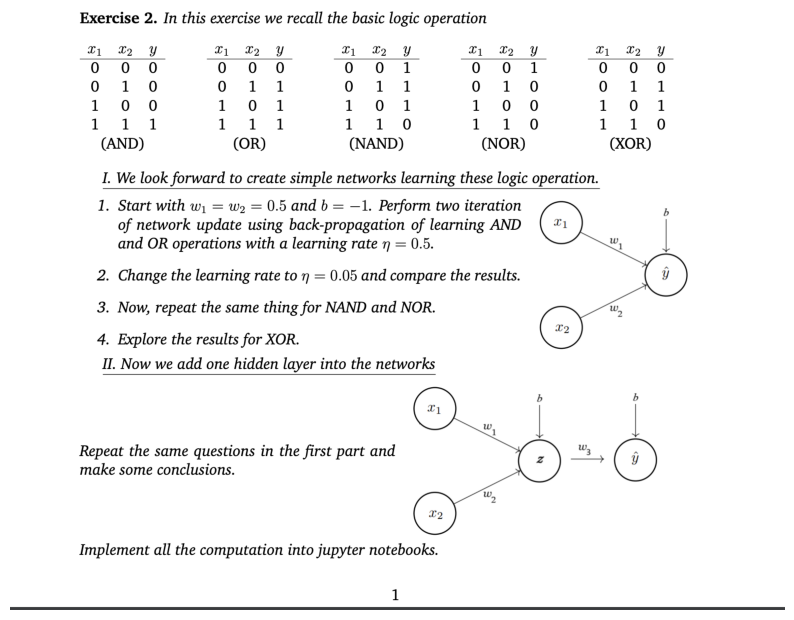

In [76]:
from PIL import Image
import matplotlib.pyplot as plt
image_path = '/content/exe_2.png'
image = Image.open(image_path)
image = image.convert('RGB')
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [77]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(output):
    return output * (1 - output)

def mse(y, y_pred):
    return np.mean((y - y_pred) ** 2)

def mse_derivative(y, y_pred):
    return y_pred - y

def forward_pass(x, w, b):
    z = np.dot(w, x) + b
    y_pred = sigmoid(z)
    return z, y_pred


In [78]:
def backward_pass(x, y, y_pred, z, w, b, learning_rate):
    error = mse_derivative(y, y_pred) * sigmoid_derivative(y_pred)
    dw = np.dot(error, x.T)
    db = np.sum(error, axis=1, keepdims=True)
    w -= learning_rate * dw
    b -= learning_rate * db
    return w, b

In [79]:
def train_logic_gate(x, y, learning_rate, epochs):
    w = np.random.uniform(-1, 1, size=(1, x.shape[0]))
    b = np.random.uniform(-1, 1, size=(1, 1))

    for epoch in range(epochs):
        z, y_pred = forward_pass(x, w, b)
        w, b = backward_pass(x, y, y_pred, z, w, b, learning_rate)

    return w, b, y_pred

In [80]:
def forward_pass_hidden(x, w1, b1, w2, b2):
    z1 = np.dot(w1, x) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(w2, a1) + b2
    y_pred = sigmoid(z2)
    return z1, a1, z2, y_pred

In [81]:
def backward_pass_hidden(x, y, y_pred, z1, a1, z2, w1, b1, w2, b2, learning_rate):
    error_output = mse_derivative(y, y_pred) * sigmoid_derivative(y_pred)
    dw2 = np.dot(error_output, a1.T)
    db2 = np.sum(error_output, axis=1, keepdims=True)

    error_hidden = np.dot(w2.T, error_output) * sigmoid_derivative(a1)
    dw1 = np.dot(error_hidden, x.T)
    db1 = np.sum(error_hidden, axis=1, keepdims=True)

    w1 -= learning_rate * dw1
    b1 -= learning_rate * db1
    w2 -= learning_rate * dw2
    b2 -= learning_rate * db2

    return w1, b1, w2, b2

In [82]:
def train_xor(x, y, learning_rate, epochs):
    w1 = np.random.uniform(-1, 1, size=(2, x.shape[0]))
    b1 = np.random.uniform(-1, 1, size=(2, 1))
    w2 = np.random.uniform(-1, 1, size=(1, 2))
    b2 = np.random.uniform(-1, 1, size=(1, 1))

    for epoch in range(epochs):
        z1, a1, z2, y_pred = forward_pass_hidden(x, w1, b1, w2, b2)
        w1, b1, w2, b2 = backward_pass_hidden(x, y, y_pred, z1, a1, z2, w1, b1, w2, b2, learning_rate)

    return w1, b1, w2, b2, y_pred


In [83]:
logic_gates = {
    "AND": (np.array([[0, 0, 1, 1], [0, 1, 0, 1]]), np.array([[0, 0, 0, 1]])),
    "OR": (np.array([[0, 0, 1, 1], [0, 1, 0, 1]]), np.array([[0, 1, 1, 1]])),
    "NAND": (np.array([[0, 0, 1, 1], [0, 1, 0, 1]]), np.array([[1, 1, 1, 0]])),
    "NOR": (np.array([[0, 0, 1, 1], [0, 1, 0, 1]]), np.array([[1, 0, 0, 0]])),
    "XOR": (np.array([[0, 0, 1, 1], [0, 1, 0, 1]]), np.array([[0, 1, 1, 0]]))
}

learning_rate = 0.5
epochs = 10000

for gate, (x, y) in logic_gates.items():
    print(f"Training {gate} gate:")
    if gate == "XOR":
        w1, b1, w2, b2, y_pred = train_xor(x, y, learning_rate, epochs)
    else:
        w, b, y_pred = train_logic_gate(x, y, learning_rate, epochs)

    print(f"Predictions:\n{y_pred.round()}\n")

Training AND gate:
Predictions:
[[0. 0. 0. 1.]]

Training OR gate:
Predictions:
[[0. 1. 1. 1.]]

Training NAND gate:
Predictions:
[[1. 1. 1. 0.]]

Training NOR gate:
Predictions:
[[1. 0. 0. 0.]]

Training XOR gate:
Predictions:
[[0. 1. 1. 0.]]

